In [1]:
import pickle

import matplotlib.pyplot as plt
import pandas as pd

# Scripting experiments

With the new and improved `obd_run.py` and `Experiment` class (see Experiment Interface notebook), we can easily script end to end experiments.

## An OpenBanditDataset experiment

An OpenBanditDataset experiment requires a `dataset_spec.yaml`, `estimator_spec.yaml`, and `policy_spec.yaml`, where the `policy_spec.yaml` can be a _list_ of policies. 

In [2]:
!ls ../experiments/obd_demo/

dataset_spec.yaml   estimator_spec.yaml policy_spec.yaml    results.pickle


In [3]:
!cat ../experiments/obd_demo/policy_spec.yaml

- key: BernoulliTS
  name: obd_demo
  parameters:
    batch_size: 5
    is_zozotown_prior: True
    campaign: all
- key: EpsilonGreedy
  name: obd_demo
  parameters:
    epsilon: 0.2
    batch_size: 5


Then we just point `obp_run.py` at the experiment directory and let it do it's thing!

In [4]:
!python ../scripting/obp_run.py --experiment-dir ../experiments/obd_demo

6:35:54 INFO: Building dataset
/Users/danturkel/.pyenv/versions/sd_bandits/lib/python3.7/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
6:36:08 INFO: Building policies
6:36:08 INFO: Building estimators
6:36:08 INFO: Running experiment
6:36:08 INFO: Obtaining logged feedback
6:36:08 INFO: Done in 0.0 seconds
6:36:08 INFO: Fitting regression model
6:37:18 INFO: Done in 70.46 seconds
6:37:18 INFO: Running simulations
6:37:18 INFO: [1 of 2] Running simulation for bts
100%|██████████████████████████████| 1374327/1374327 [01:15<00:00, 18235.91it/s]
6:38:37 INFO: [2 of 2] Running simulation for egreedy_1.0
100%|██████████████████████████████| 1374327/1374327 [00:21<00:00, 62808.15it/s]
6:39:05 INFO: Done in 106.54 seconds
6:39:05 INFO: Estimating rewards
6:39:05 INFO: [1 of 3] Estimating reward confidence interval for logged
6:39:08 INFO: [2 of 3] Est

It drops a `results.pickle` file in the experiments directory with the `OBDExperiment` object.

In [5]:
with open("../experiments/obd_demo/results.pickle","rb") as f:
    obd_results = pickle.load(f)

For a quick summary of the outcomes, we have `reward_summary`:

In [6]:
obd_results["reward_summary"]

{'logged': {'mean': 0.0034761887090917964,
  '95.0% CI (lower)': 0.0033740150633728362,
  '95.0% CI (upper)': 0.003591994481662661},
 'bts': {'mean': 0.003826173046107056,
  '95.0% CI (lower)': 0.0038242559694829756,
  '95.0% CI (upper)': 0.0038278703616714815},
 'egreedy_1.0': {'mean': 0.003618176068505505,
  '95.0% CI (lower)': 0.003616472341521467,
  '95.0% CI (upper)': 0.0036200831868479348}}

In [7]:
obd_results["policy_feedback"]["egreedy_1.0"]["reward"].sum()

4972.714272567139

If we want to dive deeper into the rewards for each policy, we can access the full feedback dictionary for the _logged_ baseline data and partial feedback dictionaries for the _estimated_ policies:

In [8]:
for policy_name, feedback in obd_results["policy_feedback"].items():
    print(f"Feedback for {policy_name}:")
    print("\n".join([f"  {key}" for key in feedback.keys()]))

Feedback for logged:
  n_rounds
  n_actions
  reward
Feedback for bts:
  reward
Feedback for egreedy_1.0:
  reward


## A Deezer experiment

Deezer experiments only require a `dataset_spec.yaml` and `policy_spec.yaml`, since they don't use off-policy estimators.

In [9]:
!ls ../experiments/deezer_demo

dataset_spec.yaml policy_spec.yaml  results.pickle


Notice we include the random baseline _as a Random policy_. 

Also notice that extra parameters to pass to DeezerDataset's obtain_batch_bandit_feedback method (like `cascade`, `users_per_batch`, etc) can be included in `meta`.

In [10]:
!cat ../experiments/deezer_demo/policy_spec.yaml

- key: Random
  name: deezer_demo
  parameters:
    len_list: 12
    n_actions: 862
  meta:
    users_per_batch: 1000
- key: EpsilonGreedy
  name: deezer_demo
  parameters:
    batch_size: 1
    epsilon: 0.1
    len_list: 12
    n_actions: 862
    policy_name: "egreedy_0.1"
  meta:
    users_per_batch: 1000


In [11]:
!python ../scripting/obp_run.py --experiment-dir ../experiments/deezer_demo

6:39:33 INFO: Building dataset
6:39:50 INFO: Building policies
6:39:50 INFO: Running experiment
6:39:50 INFO: Learning and obtaining policy feedback
6:39:50 INFO: [1 of 2] Learning and obtaining random feedback
Simulating online learning: 100%|█████| 100000/100000 [00:18<00:00, 5549.77it/s]
6:40:10 INFO: [2 of 2] Learning and obtaining egreedy_0.1 feedback
Simulating online learning: 100%|█████| 100000/100000 [00:17<00:00, 5580.14it/s]
6:40:29 INFO: Done in 39.11 seconds
6:40:29 INFO: Estimating reward confidence interval for random baseline feedback
6:40:29 INFO: [1 of 2] Estimating reward confindence interval for random feedback
6:40:30 INFO: [2 of 2] Estimating reward confindence interval for egreedy_0.1 feedback
6:40:30 INFO: Done in 1.34 seconds
6:40:30 INFO: Experiment finished in 40.45 seconds
6:40:30 INFO: Writing output to results ../experiments/deezer_demo/results.pickle
6:40:31 INFO: Bye!


Once again we get a `results.pickle` file.

In [16]:
with open("../experiments/deezer_demo/results.pickle","rb") as f:
    deezer_results = pickle.load(f)

And here's the reward summary:

In [18]:
deezer_results["reward_summary"]

{'random': {'mean': 0.027138331541681427,
  '95.0% CI (lower)': 0.026726742056175794,
  '95.0% CI (upper)': 0.027597169590362312},
 'egreedy_0.1': {'mean': 0.061335380746257835,
  '95.0% CI (lower)': 0.060672018958721256,
  '95.0% CI (upper)': 0.06211212003965855}}

In [25]:
random = pd.DataFrame(
    {
        "reward": deezer_results["policy_feedback"]["random"]["reward"],
        "batch": deezer_results["policy_feedback"]["random"]["batches"],
        "pol": "bts"
    }
)
eps = pd.DataFrame(
    {
        "reward": deezer_results["policy_feedback"]["egreedy_0.1"]["reward"],
        "batch": deezer_results["policy_feedback"]["egreedy_0.1"]["batches"],
        "pol": "egreedy_0.1"
    }
)


Text(0, 0.5, 'cumulative rewards')

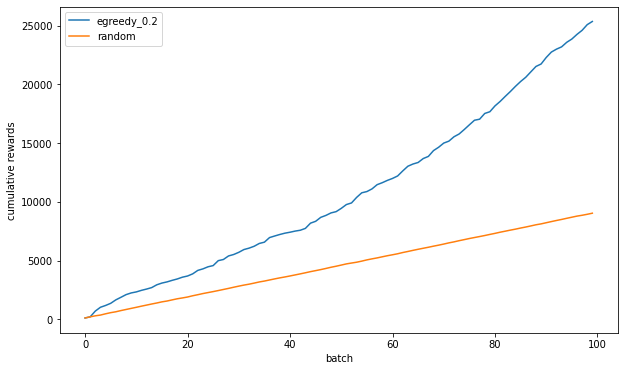

In [27]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(eps.groupby("batch").sum().cumsum(), label="egreedy_0.2")
ax.plot(random.groupby("batch").sum().cumsum(), label="random")
ax.legend()
ax.set_xlabel("batch")
ax.set_ylabel("cumulative rewards")